## PRINCIPAL COMPONENT ANALYSIS

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def load_credit_card():
    data = pd.read_csv("CC GENERAL.csv")
    return data

data = load_credit_card()
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,nan,0.000,12
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000,1564.475,2081.532,0.000,128.282,873.385,2054.140,19043.139
BALANCE_FREQUENCY,8950.000,0.877,0.237,0.000,0.889,1.000,1.000,1.000
PURCHASES,8950.000,1003.205,2136.635,0.000,39.635,361.280,1110.130,49039.570
ONEOFF_PURCHASES,8950.000,592.437,1659.888,0.000,0.000,38.000,577.405,40761.250
INSTALLMENTS_PURCHASES,8950.000,411.068,904.338,0.000,0.000,89.000,468.637,22500.000
CASH_ADVANCE,8950.000,978.871,2097.164,0.000,0.000,0.000,1113.821,47137.212
PURCHASES_FREQUENCY,8950.000,0.490,0.401,0.000,0.083,0.500,0.917,1.000
ONEOFF_PURCHASES_FREQUENCY,8950.000,0.202,0.298,0.000,0.000,0.083,0.300,1.000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000,0.364,0.397,0.000,0.000,0.167,0.750,1.000
CASH_ADVANCE_FREQUENCY,8950.000,0.135,0.200,0.000,0.000,0.000,0.222,1.500


### DATA PREPROCESSING - FEATURE ENGINEERING

In [29]:
#Count missing variable

data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [30]:
# Filling Missing Variable

data['MINIMUM_PAYMENTS'].fillna(data["PAYMENTS"], inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

In [31]:
# Feature Engineering

data["new_BALANCE_BALANCE_FREQUENCY"] = data["BALANCE"] * data["BALANCE_FREQUENCY"]
data["new_ONEOFF_PURCHASES_PURCHASES"] = data["ONEOFF_PURCHASES"] / data["PURCHASES"]
data["new_INSTALLMENTS_PURCHASES_PURCHASES"] = data["INSTALLMENTS_PURCHASES"] / data["PURCHASES"]
data["new_CASH_ADVANCE_PURCHASES_PURCHASES"] = data["CASH_ADVANCE"] * data["CASH_ADVANCE_FREQUENCY"]
data["new_PURCHASES_PURCHASES_FREQUENCY"] = data["PURCHASES"] * data["PURCHASES_FREQUENCY"]
data["new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY"] = data["PURCHASES"] * data["ONEOFF_PURCHASES_FREQUENCY"]
data["new_PURCHASES_PURCHASES_TRX"] = data["PURCHASES"] / data["PURCHASES_TRX"]
data["new_CASH_ADVANCE_CASH_ADVANCE_TRX"] = data["CASH_ADVANCE"] / data["CASH_ADVANCE_TRX"]
data["new_BALANCE_CREDIT_LIMIT"] = data["BALANCE"] / data["CREDIT_LIMIT"]
data["new_PAYMENTS_CREDIT_LIMIT"] = data["PAYMENTS"] / data["MINIMUM_PAYMENTS"]

In [32]:
#Checking missing variable

data.isnull().sum().sort_values(ascending=False).head()

new_CASH_ADVANCE_CASH_ADVANCE_TRX       4628
new_ONEOFF_PURCHASES_PURCHASES          2044
new_INSTALLMENTS_PURCHASES_PURCHASES    2042
new_PURCHASES_PURCHASES_TRX             2041
new_PAYMENTS_CREDIT_LIMIT                240
dtype: int64

In [33]:
data.fillna(0, inplace=True)

In [34]:
#Dropping CUST_ID feature

data.drop(['CUST_ID'], axis=1, inplace=True)

In [35]:
# Outlier Handling

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in data.columns:
    replace_with_thresholds(data, col)

In [36]:
# Standard Scaling

names = data.columns
sc = StandardScaler()
df = sc.fit_transform(data)
data_scaled = pd.DataFrame(df, columns=names)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,new_BALANCE_BALANCE_FREQUENCY,new_ONEOFF_PURCHASES_PURCHASES,new_INSTALLMENTS_PURCHASES_PURCHASES,new_CASH_ADVANCE_PURCHASES_PURCHASES,new_PURCHASES_PURCHASES_FREQUENCY,new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY,new_PURCHASES_PURCHASES_TRX,new_CASH_ADVANCE_CASH_ADVANCE_TRX,new_BALANCE_CREDIT_LIMIT,new_PAYMENTS_CREDIT_LIMIT
0,-0.732,-0.249,-0.467,-0.411,-0.373,-0.479,-0.806,-0.679,-0.707,-0.675,...,-0.720,-0.891,1.406,-0.342,-0.448,-0.337,-0.176,-0.457,-0.978,-0.374
1,0.787,0.134,-0.516,-0.411,-0.488,2.686,-1.222,-0.679,-0.917,0.574,...,0.664,-0.891,-0.911,1.076,-0.457,-0.337,-0.497,3.179,0.198,-0.160
2,0.447,0.518,-0.112,0.141,-0.488,-0.479,1.270,2.673,-0.917,-0.675,...,0.463,1.456,-0.911,-0.342,-0.022,0.183,-0.063,-0.457,-0.154,-0.415
3,0.049,-1.017,0.268,0.659,-0.488,-0.378,-1.014,-0.399,-0.917,-0.259,...,-0.226,1.456,-0.911,-0.327,-0.387,-0.253,9.606,0.008,-0.466,-0.505
4,-0.359,0.518,-0.508,-0.399,-0.488,-0.479,-1.014,-0.399,-0.917,-0.675,...,-0.343,1.456,-0.911,-0.342,-0.457,-0.336,-0.389,-0.457,0.830,-0.255


### PCA

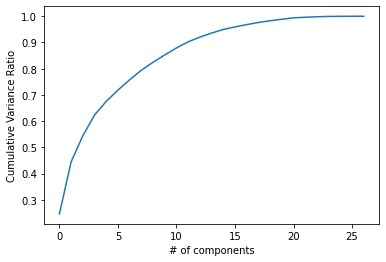

In [37]:
# Finding optimum number of components

pca = PCA().fit(data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.show()

In [38]:
pca = PCA(n_components=6)
pca_fit = pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.24619056, 0.19840047, 0.09943186, 0.07934874, 0.05194937,
       0.04305699])

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24619056, 0.44459103, 0.54402289, 0.62337163, 0.675321  ,
       0.71837799])